# exercise1 linear regression

## linear regression of simple variable

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
path = './ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [38]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


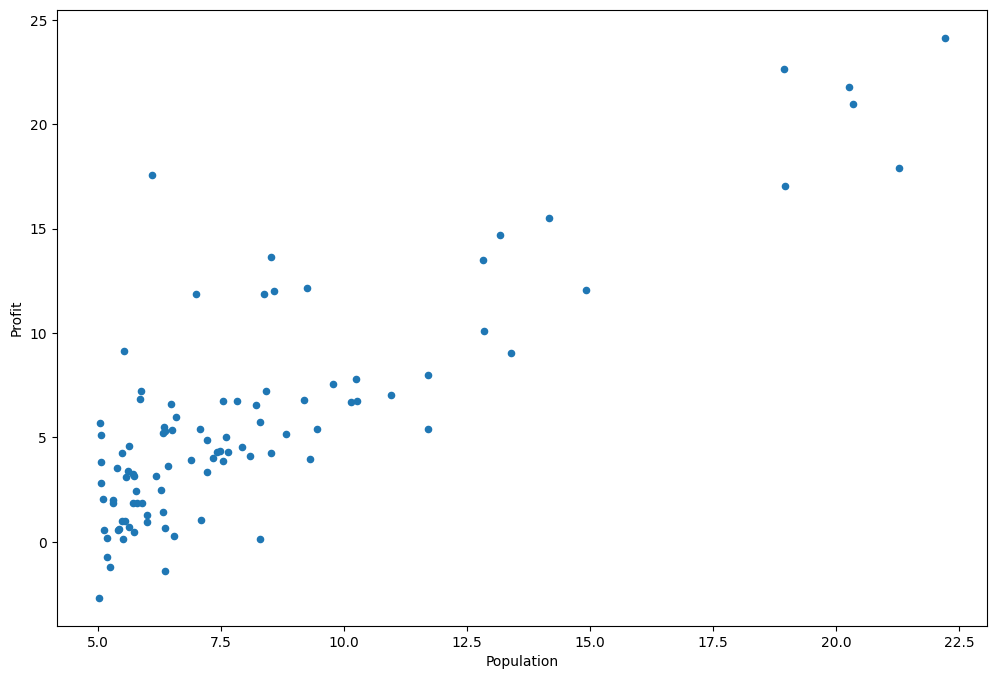

In [39]:
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12, 8))
plt.show()

In [40]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


In [41]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [89]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:,cols-1:cols]



In [90]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [91]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [92]:
theta = np.matrix(np.array([0, 0]))
X = np.matrix(X.values)
y = np.matrix(y.values)

In [93]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [ ]:
computeCost(X, y, theta) # Cost function

32.072733877455676

In [95]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [96]:
alpha = 0.01
iters = 1000

In [97]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [98]:
computeCost(X, y, g)

4.515955503078914

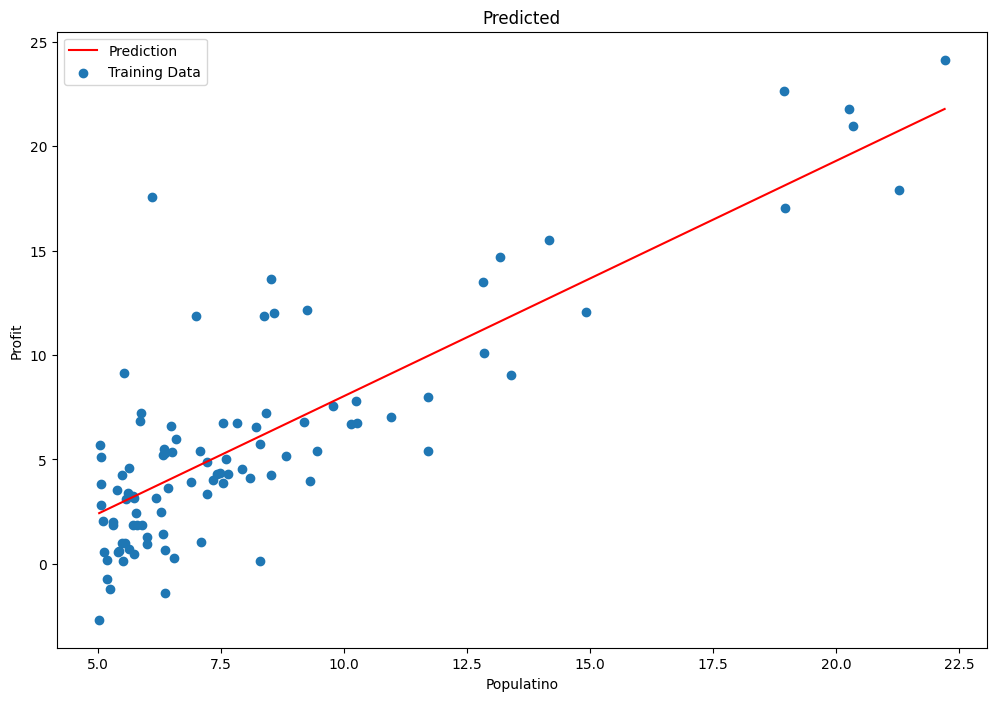

In [100]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label="Prediction")
ax.scatter(data.Population, data.Profit, label="Training Data")
ax.legend(loc=2)
ax.set_xlabel('Populatino')
ax.set_ylabel("Profit")
ax.set_title("Predicted")
plt.show()

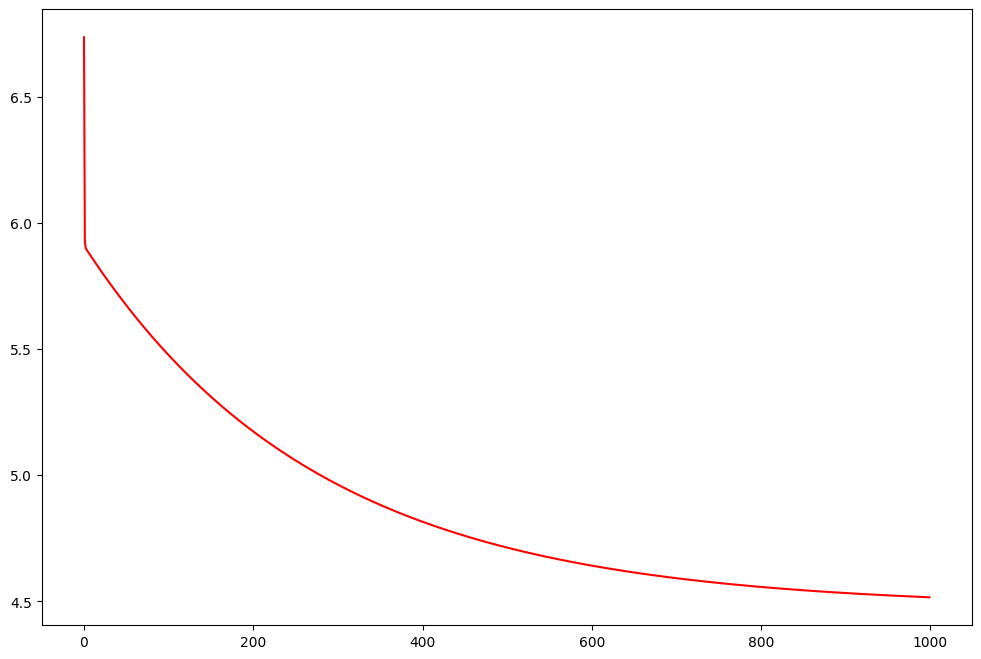

In [101]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
plt.show()